In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

Зададим количество измерений и размеры выборок. Заведем массив для супремумов.

In [2]:
sample_sizes = [10, 100, 1000, 10000]
sample_amount = len(sample_sizes)
supremums = []

Проведем исследование на примере функции нормального распределения.
Построим истинную функцию распределения на отрезке [-3; 3].

In [3]:
x_true = np.linspace(-3, 3, 1000)
y_true = (1 + special.erf(x_true / np.sqrt(2))) / 2

Определим функцию для построения эмперической функции распредления по выборке

In [4]:
def emperic(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n + 1) / n
    return x, y

Изобразим истинную и эмперическую функции распределения на графике.
Посчитаем супремумы.

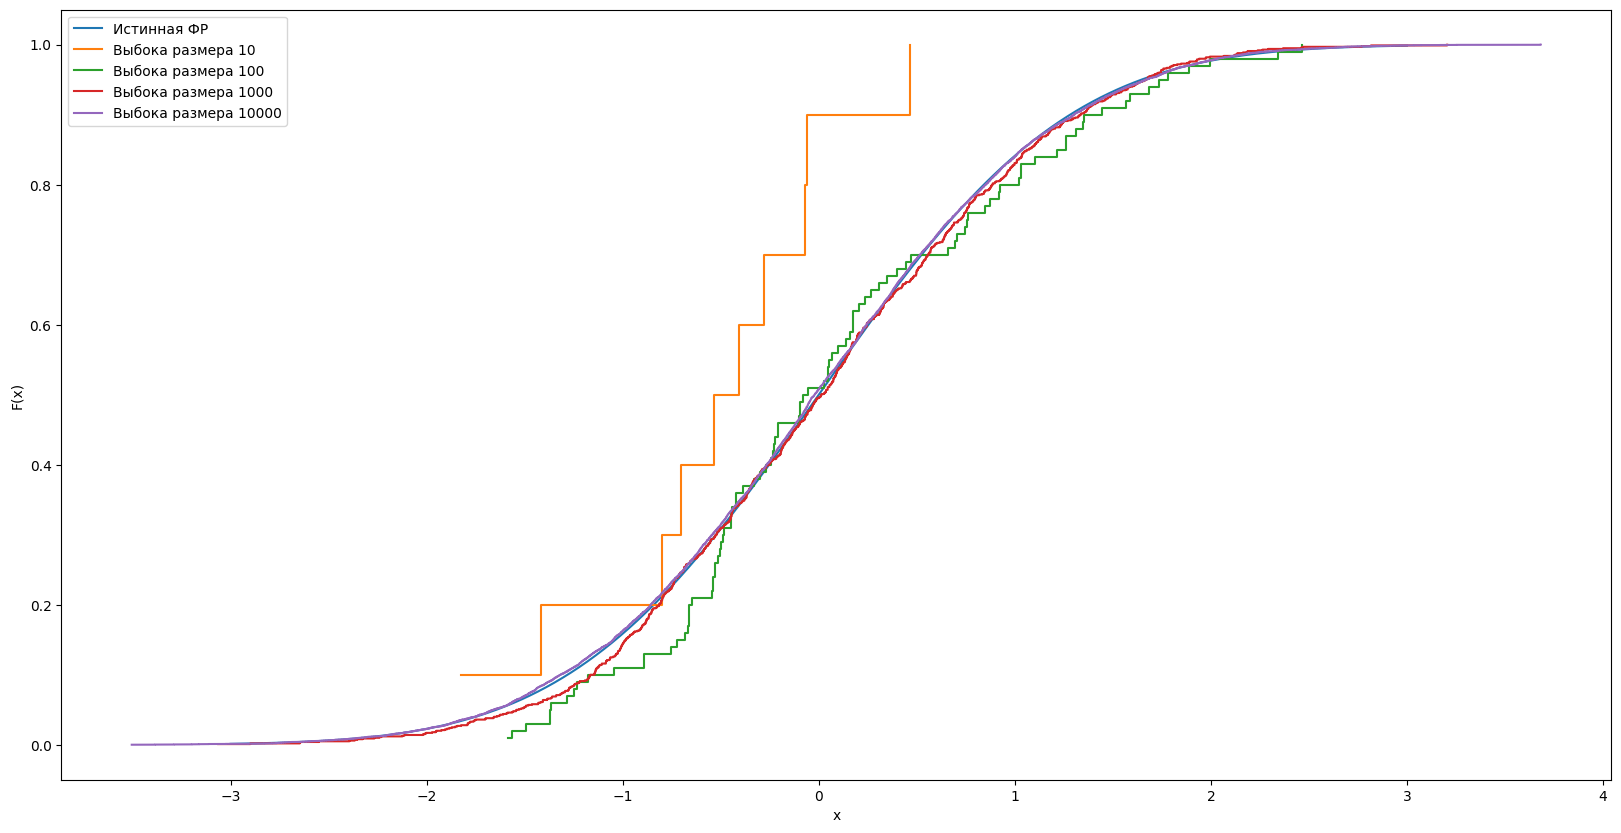

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(x_true, y_true, label="Истинная ФР")

for size in sample_sizes:
    #Генерируем случайные данные
    sample = np.random.randn(size)

    #Строим эмперическую функцию распределения
    x_emp, y_emp = emperic(sample)

    #Считаем супремум разности
    supremums.append(np.max(np.abs(np.interp(x_true, x_emp, y_emp) - y_true)))

    #Добавляем график
    plt.step(x_emp, y_emp, label=f"Выбока размера {size}", where='post')

plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

## Результаты измерений

In [6]:
for i, size in enumerate(sample_sizes):
    print(f"Супремум разности для выборки размера {size}: {supremums[i]}")

Супремум разности для выборки размера 10: 0.423343222827012
Супремум разности для выборки размера 100: 0.08775215613826864
Супремум разности для выборки размера 1000: 0.02535579313231283
Супремум разности для выборки размера 10000: 0.009812023053188235


In [ ]:
По результатам моделирования видно, что при увеличении размера выборки, 